In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

import sys
sys.path.append('..')
from phydeap.PhotonicDevices import AddDropMRR, BPD_output
from phydeap.DEAPNetwork import DEAP_Network
from phydeap.MRRNetwork import MRR_Network

## 1. Example of Add-Drop Microring resonator

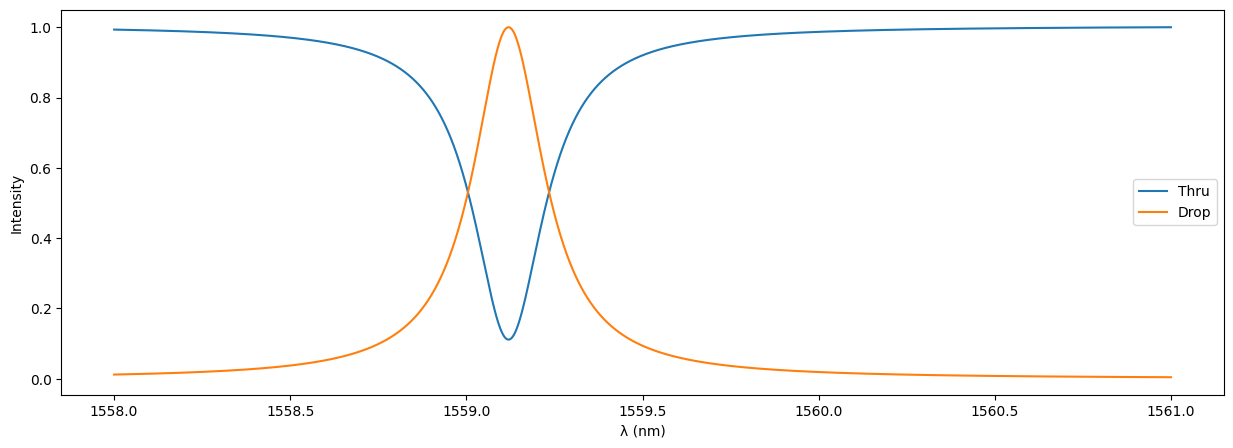

In [2]:
""" 
________________________________________
  TEST Add-Drop Microring resonator
________________________________________

MRR illustration: ↓

    <- Drop [E8]               Prt
    ____________________________
           ┌───────────┐
           |           │
           │   ┌───┐   │
           │   │   │   │
           |   └───┘   |
           │           │
           └───────────┘
    ____________________________
    -> Input [E1]             ->Through [E2] 

"""

'''
.........................
    PARAMETERS:
.........................
'''

#Define the wavelength range
Lambda1 = 1558e-9
Lambda2 = 1561e-9
Number_points = 10000
lam = np.linspace(Lambda1, Lambda2, Number_points) 

#ports for thru and drop:
port_1 = 1
port_2 = 2

#coupling coefficients:
r1 = 0.9816
r2 = 0.9816
a = 0.9816

R = 8000.0e-9 #ring radius
PS_neff = 3.505 #phase shifter effective refractive index shift

#parameters:
par = [port_1, port_2, r1, r2, a, R, PS_neff,lam]

'''
.........................
    SIMULATION:
.........................
'''

# Create an instance of the class
MRRt = AddDropMRR(*par)
input_field = 1*np.exp(0*1j)

# Normalized intensity of Thru and Drop ports
I_E8 = (abs(MRRt.propagate(input_field)[1]))**2/np.max((abs(MRRt.propagate(input_field)[1]))**2)
I_E2 = (abs(MRRt.propagate(input_field)[2]))**2/np.max((abs(MRRt.propagate(input_field)[2]))**2)

'''
.........................
    PLOT:
.........................
'''

# plot electric fields intensity of Thru and Drop ports
plt.figure(figsize=(15,5))
plt.plot(lam*1e9, I_E2, label="Thru")
plt.plot(lam*1e9, I_E8, label="Drop")
plt.legend()
plt.xlabel('λ (nm)')
plt.ylabel('Intensity')
plt.show()

## 2. Example of a microring resonator array

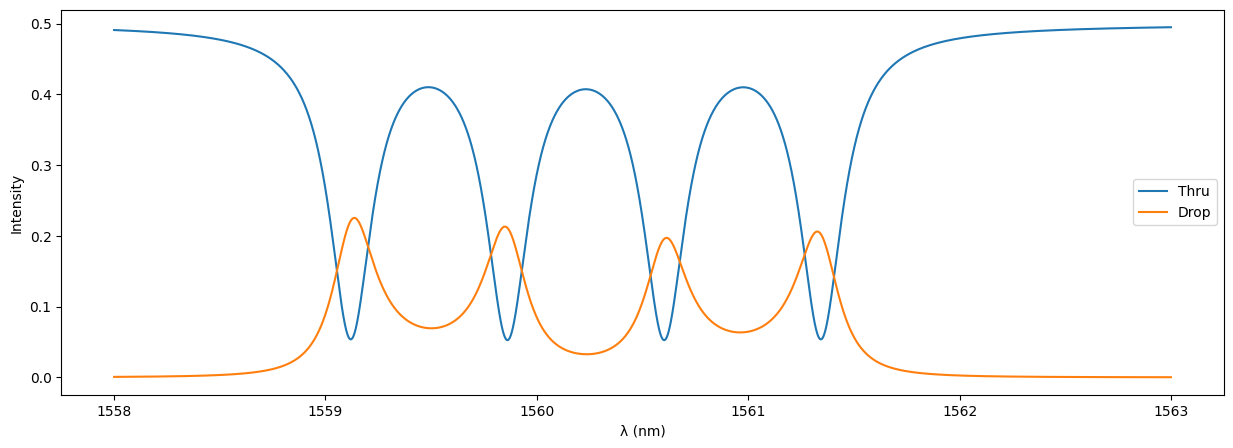

In [3]:
""" 
________________________________________________________________
    TEST Simulation of a microring resonator array
________________________________________________________________

 MRR array illustration: ↓

  <- Drop 
  ____________________________________________________________ . . . 
       ┌───────────┐    ┌───────────┐    ┌───────────┐
       |           │    |           │    |           │
       │   ┌───┐   │    │   ┌───┐   │    │   ┌───┐   │
       │   │   │   │    │   │   │   │    │   │   │   │         . . .
       │   └───┘   │    │   └───┘   │    │   └───┘   │
       │           │    │           │    │           │
       └───────────┘    └───────────┘    └───────────┘
 _____________________________________________________________ . . . 
 -> Input                                            -> Through

"""

'''
.........................
    PARAMETERS:
.........................
'''

port_T = 1
port_D = 2

#coupling coefficients:
r1 = 0.9816
r2 = 0.9816
a = 0.9816

R = 8000.0e-9 #ring radius
silicon_neff = 3.5 #refractive index of silicon
Lw = 2e-9 #tiny spacing between Thru/input waveguides (beyond the ring diameter) in meters.
       
num_MRR = 4  #number of cascaded MRRs
input_field = 1*np.exp(1*1j)  # Define input electric field

#Define the wavelength range
Lambda1 = 1558e-9
Lambda2 = 1563e-9
Number_points = 10000
lam = np.linspace(Lambda1, Lambda2, Number_points)  

# Define the refractive index shift for Add-DRop MRR - usually connect to a phase shifter:
PS_neff = np.array(3.505 + np.linspace(0.00,0.005,num_MRR))  

#parameters:
Params = {}
for i in range(num_MRR):
    Params["MRR"+str(i)] = [i,i+1, r1, r2, a, R, PS_neff[i],lam]

'''
.........................
    SIMULATION:
.........................
'''

# Create an instance of the class
mrr = MRR_Network(port_T, port_D, num_MRR, input_field, silicon_neff, Lw, **Params)

# Normalized intensity of Thru and Drop ports
I_E_T = (abs(mrr.propagate(input_field)[1]))**2
I_E_D = (abs(mrr.propagate(input_field)[2]))**2

'''
.........................
    PLOT:
.........................
'''

# plot electric fields intensity of Thru and Drop ports
plt.figure(figsize=(15,5))
plt.plot(lam*1e9, I_E_T, label="Thru")
plt.plot(lam*1e9, I_E_D, label="Drop")
plt.legend()
plt.xlabel('λ (nm)')
plt.ylabel('Intensity')
plt.show()

## 3. (1/2) Example of a microring resonator DEAP array  with a refractive index shift

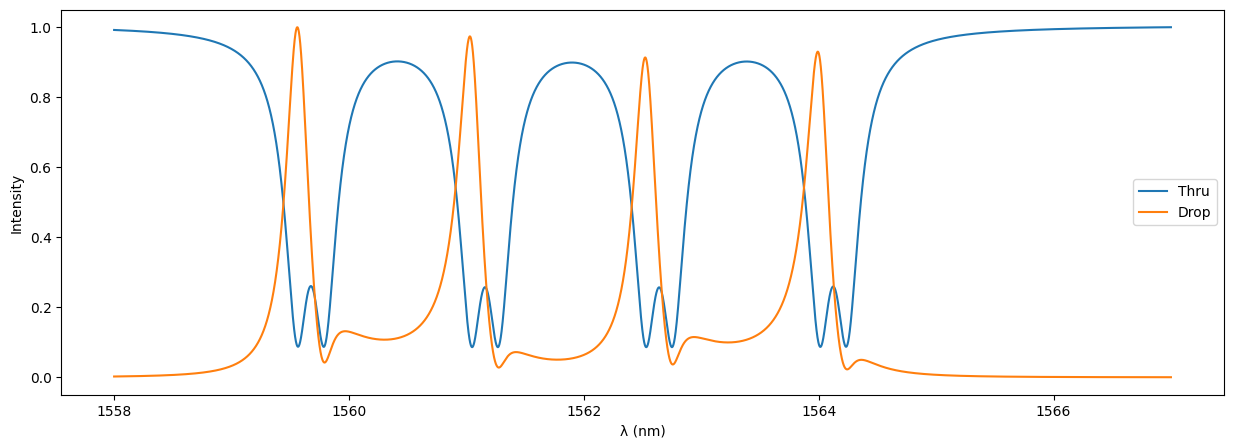

In [4]:
""" 
________________________________________________________________
    TEST Simulation of a microring resonator DEAP array (1/2)
________________________________________________________________

MRR array illustration: ↓
        
                                              <- Drop                                 
                                        . . .  ________________________________________ 
       ┌───────────┐    ┌───────────┐          ┌───────────┐    ┌───────────┐           
       |           │    |           │          |           │    |           │             
       │   ┌───┐   │    │   ┌───┐   │          │   ┌───┐   │    │   ┌───┐   │             
       │   │   │   │    │   │   │   │  . . .   │   │   │   │    │   │   │   │  . . .      
       │   └───┘   │    │   └───┘   │          │   └───┘   │    │   └───┘   │             
       │           │    │           │          │           │    │           │             
       └───────────┘    └───────────┘          └───────────┘    └───────────┘            
    ___________________________________ . . . _________________________________________ 
                                                                                        
    -> Input                                                                 -> Through
    


"""

'''
.........................
    PARAMETERS:
.........................
'''

port_T = 1
port_D = 2

num_MRR = 4  #number of cascaded MRRs
input_field = 1*np.exp(1*1j)  # Define input electric field

#coupling coefficients:
r1 = 0.9816
r2 = 0.9816
a = 0.9816

R = 8000.0e-9 #ring radius
silicon_neff = 3.5 #refractive index of silicon
Lw = 2e-9 #tiny spacing between Thru/input waveguides (beyond the ring diameter) in meters.

#Define the wavelength range
Lambda1 = 1558e-9
Lambda2 = 1567e-9
Number_points = 10000
lam = np.linspace(Lambda1, Lambda2, Number_points)  

# Define the refractive index shift for All-Pass MRR - usually connect to a phase shifter:
PS_neff_AP = np.array(3.5065 + np.linspace(0.00,0.01,num_MRR))  
# Define the refractive index shift for Add-Drop MRR - usually connect to a phase shifter:
PS_neff_AD = np.array(3.506 + np.linspace(0.00,0.01,num_MRR))  #connect to phase shifter

#parameters:
Params = {}
for i in range(num_MRR):
    Params["MRR_AP"+str(i)] = [i,i+1, r1, r2, a, R, PS_neff_AP[i], lam]
    Params["MRR_AD"+str(i)] = [i,i+1, r1, r2, a, R, PS_neff_AD[i], lam]

'''
.........................
   SIMULATION:
.........................
'''

# Create an instance of the class
mrr = DEAP_Network(port_T, port_D, num_MRR, input_field, silicon_neff, Lw, **Params)

# Normalized intensity  of Thru and Drop ports
I_E_T = (abs(mrr.propagate(input_field)[1]))**2/np.max((abs(mrr.propagate(input_field)[1]))**2)
I_E_D = (abs(mrr.propagate(input_field)[2]))**2/np.max((abs(mrr.propagate(input_field)[2]))**2)

'''
.........................
    PLOT:
.........................
'''

# plot electric fields intensity  of Thru and Drop ports
plt.figure(figsize=(15,5))
plt.plot(lam*1e9, I_E_T, label="Thru")
plt.plot(lam*1e9, I_E_D, label="Drop")
plt.legend()
plt.xlabel('λ (nm)')
plt.ylabel('Intensity')
plt.show()

## 4. (2/2) Example of a microring resonator DEAP array  with a refractive index shift

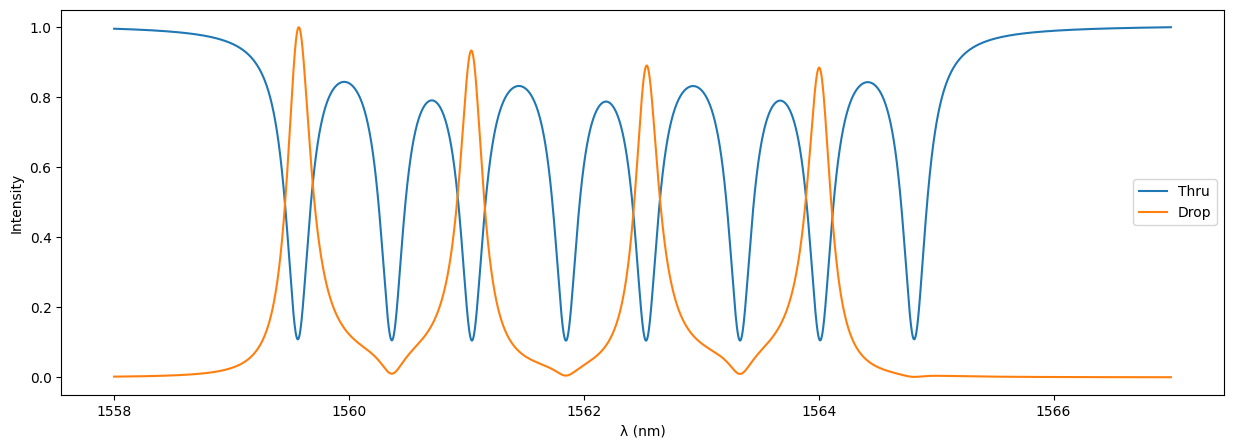

In [5]:
""" 
________________________________________________________________
    TEST Simulation of a microring resonator DEAP array (2/2)
________________________________________________________________

MRR array illustration: ↓
    
                                              <- Drop                                 
                                        . . .  ________________________________________ 
       ┌───────────┐    ┌───────────┐          ┌───────────┐    ┌───────────┐           
       |           │    |           │          |           │    |           │             
       │   ┌───┐   │    │   ┌───┐   │          │   ┌───┐   │    │   ┌───┐   │             
       │   │   │   │    │   │   │   │  . . .   │   │   │   │    │   │   │   │  . . .      
       │   └───┘   │    │   └───┘   │          │   └───┘   │    │   └───┘   │             
       │           │    │           │          │           │    │           │             
       └───────────┘    └───────────┘          └───────────┘    └───────────┘            
    ___________________________________ . . . _________________________________________ 
                                                                                        
    -> Input                                                                 -> Through
    

"""


'''
.........................
    PARAMETERS:
.........................
'''

port_T = 1
port_D = 2

num_MRR = 4  #number of cascaded MRRs
input_field = 1*np.exp(1*1j)  # Define input electric field

#coupling coefficients:
r1 = 0.9816
r2 = 0.9816
a = 0.9816

R = 8000.0e-9 #ring radius
silicon_neff = 3.5 #refractive index of silicon
Lw = 2e-9 #tiny spacing between Thru/input waveguides (beyond the ring diameter) in meters.

#Define the wavelength range
Lambda1 = 1558e-9
Lambda2 = 1567e-9
Number_points = 10000
lam = np.linspace(Lambda1, Lambda2, Number_points)  

# Define the refractive index shift for All-Pass MRR - usually connect to a phase shifter:
PS_neff_AP = np.array(3.5078 + np.linspace(0.00,0.01,num_MRR))  
# Define the refractive index shift for Add-Drop MRR - usually connect to a phase shifter:
PS_neff_AD = np.array(3.506 + np.linspace(0.00,0.01,num_MRR))  #connect to phase shifter

#parameters:
Params = {}
for i in range(num_MRR):
    Params["MRR_AP"+str(i)] = [i,i+1, r1, r2, a, R, PS_neff_AP[i], lam]
    Params["MRR_AD"+str(i)] = [i,i+1, r1, r2, a, R, PS_neff_AD[i], lam]

'''
.........................
    SIMULATION:
.........................
'''

# Create an instance of the class
mrr = DEAP_Network(port_T, port_D, num_MRR, input_field, silicon_neff, Lw, **Params)

# Normalized intensity  of Thru and Drop ports
I_E_T = (abs(mrr.propagate(input_field)[1]))**2/np.max((abs(mrr.propagate(input_field)[1]))**2)
I_E_D = (abs(mrr.propagate(input_field)[2]))**2/np.max((abs(mrr.propagate(input_field)[2]))**2)

'''
.........................
          PLOT
.........................
'''

# plot electric fields intensity  of Thru and Drop ports
plt.figure(figsize=(15,5))
plt.plot(lam*1e9, I_E_T, label="Thru")
plt.plot(lam*1e9, I_E_D, label="Drop")
plt.legend()
plt.xlabel('λ (nm)')
plt.ylabel('Intensity')
plt.show()

## 5. Example of a microring resonator DEAP array with a refractive index shift at the Output of the balanced photodiode

Change the laser_wavelengths array for more BPD output numbers!

Estimated BPD output = 1.8610151821380192


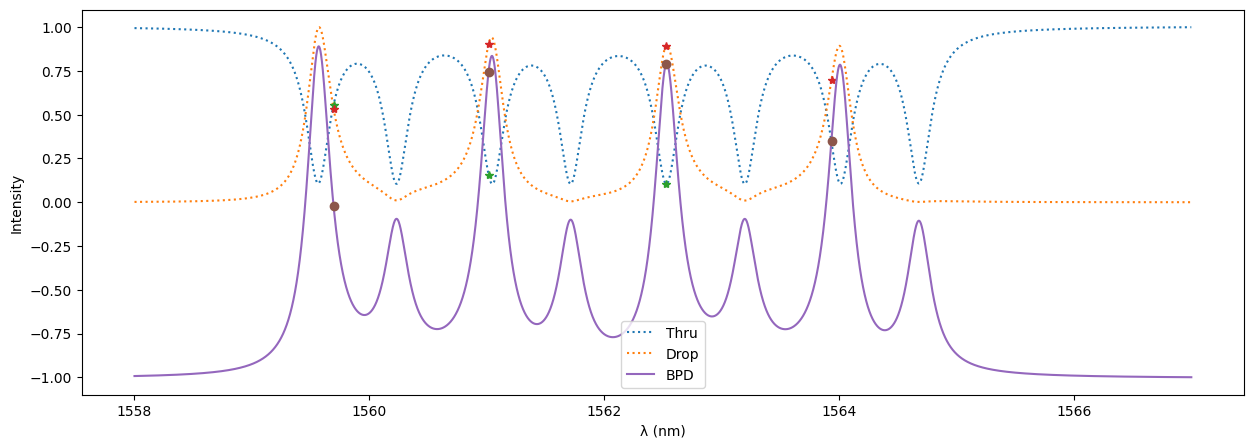

In [9]:
""" 
________________________________________________________________
  TEST Simulation of a microring resonator DEAP array and BPD
                  MUX N wavelengths
________________________________________________________________

MRR array illustration: ↓                                                    Drop ->     ____
                                                _______________________________________ | PD |
                                               | <- Drop                                |____|  
                                        . . .  |________________________________          |
       ┌───────────┐    ┌───────────┐          ┌───────────┐    ┌───────────┐             |
       |           │    |           │          |           │    |           │             |
       │   ┌───┐   │    │   ┌───┐   │          │   ┌───┐   │    │   ┌───┐   │             O---> BPD ~ (Drop - Through)
       │   │   │   │    │   │   │   │  . . .   │   │   │   │    │   │   │   │  . . .      |
       │   └───┘   │    │   └───┘   │          │   └───┘   │    │   └───┘   │             |
       │           │    │           │          │           │    │           │             |
       └───────────┘    └───────────┘          └───────────┘    └───────────┘            ____
    ___________________________________ . . . _________________________________________ | PD |
                                                                                        |____|
    -> Input                                                                 -> Through
    
"""

'''
.........................
    PARAMETERS:
.........................
'''

num_MRR = 4  #number of cascaded MRRs
input_field = 1*np.exp(1*1j)  # Define input electric field

port_T = 1
port_D = 2

#coupling coefficients:
r1 = 0.9816
r2 = 0.9816
a = 0.9816

R = 8000.0e-9 #ring radius
silicon_neff = 3.5 #refractive index of silicon
Lw = 2e-9 #tiny spacing between Thru/input waveguides (beyond the ring diameter) in meters.

#Define the wavelength range
Lambda1 = 1558e-9
Lambda2 = 1567e-9
Number_points = 10000
lam = np.linspace(Lambda1, Lambda2, Number_points)  

# Define the refractive index shift for All-Pass MRR - usually connect to a phase shifter:
PS_neff_AP = np.array(3.5075 + np.linspace(0.00,0.01,num_MRR))  
# Define the refractive index shift for Add-Drop MRR - usually connect to a phase shifter:
PS_neff_AD = np.array(3.506 + np.linspace(0.00,0.01,num_MRR))  #connect to phase shifter

#parameters:
Params = {}
for i in range(num_MRR):
    Params["MRR_AP"+str(i)] = [i,i+1, r1, r2, a, R, PS_neff_AP[i], lam]
    Params["MRR_AD"+str(i)] = [i,i+1, r1, r2, a, R, PS_neff_AD[i], lam]

'''
.........................
    SIMULATION:
.........................
'''

# Create an instance of the class
mrr = DEAP_Network(port_T, port_D, num_MRR, input_field, silicon_neff, Lw, **Params)

# Normalized intensity  of Thru and Drop ports
I_E_T = (abs(mrr.propagate(input_field)[1]))**2/np.max((abs(mrr.propagate(input_field)[1]))**2)
I_E_D = (abs(mrr.propagate(input_field)[2]))**2/np.max((abs(mrr.propagate(input_field)[2]))**2)


'''
.........................
          PLOT
.........................
'''

# USER:
laser_wavelengths = [1559.7e-9, 1561.02e-9, 1562.53e-9, 1563.94e-9] # MODIFY THIS!  Warning: len(laser_wavelengths) == num_MRR
print("Change the laser_wavelengths array for more BPD output numbers!")
print("")

[I_E_T, I_E_T, I_E_T_P, I_E_D_P, Delta_I_E, Delta_I_E_P, lam_P, peaks, lambda_original_] = BPD_output(num_MRR, lam, laser_wavelengths, I_E_T, I_E_D)

print("Estimated BPD output = " + str(np.sum(Delta_I_E_P)))

# Plot electric fields intensity of Thru and Drop ports and MUX N wavelengths
# that will go to the BPD.
plt.figure(figsize=(15,5))
plt.plot(lam*1e9, I_E_T, label="Thru", linestyle=":")
plt.plot(lam*1e9, I_E_D, label="Drop", linestyle=":")
plt.plot(lam_P, I_E_T_P,'*') 
plt.plot(lam_P, I_E_D_P,'*') 
plt.plot(lam*1e9, Delta_I_E, label="BPD")
plt.plot(lam_P, Delta_I_E_P,'o')
plt.legend()
plt.xlabel('λ (nm)')
plt.ylabel('Intensity')
plt.show()
